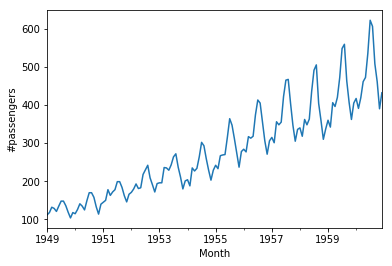

In [166]:
from pandas import Series
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import warnings
import numpy as np
warnings.filterwarnings("ignore")
series1 = Series.from_csv('C:\\Users\\saikiran\\Downloads\\AirPassengers.csv',sep=",",header=0)
series1.plot()
pyplot.xlabel('Month')
pyplot.ylabel('#passengers')
pyplot.show()

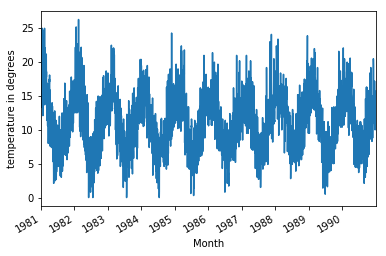

In [167]:
series2 = Series.from_csv('C:\\Users\\saikiran\\Downloads\\daily-minimum-temperatures-in-me.csv',sep=",",header=0)
series2 = series2.convert_objects(convert_numeric=True)
series2 = series2.fillna(0)
series2.plot()
pyplot.xlabel('Month')
pyplot.ylabel('temperature in degrees')
pyplot.show()

To check for the stationarity of a time series You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.If it is a bell shaped cureve then we can say that the time series is a staionary else it is not stationary

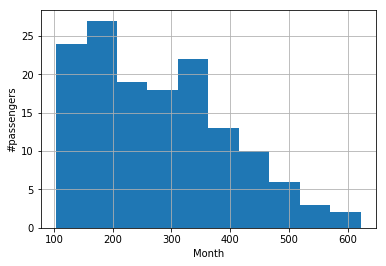

In [168]:
series1.hist()
pyplot.xlabel('Month')
pyplot.ylabel('#passengers')
pyplot.show()

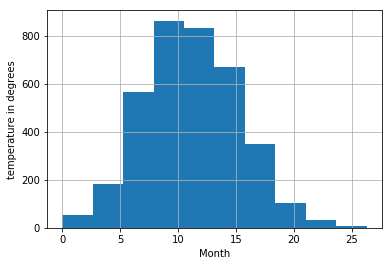

In [169]:
series2.hist()
pyplot.xlabel('Month')
pyplot.ylabel('temperature in degrees')
pyplot.show()

Now Here "daily minimum temperature dataset" looks like stationary and "Air passengers dataset" looks nonstationary. But to confirm this i am writting a stationary_check function which would take the time series as input and would split to two parts and compare the mean and variance of each half..if the two means are close to each other we can say that they are stationary else the time series would be non stationary

In [170]:
def stationary_check(timeseries):
    X = timeseries.values
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    return mean1,mean2,var1,var2

In [171]:

m1,m2,v1,v2 = stationary_check(series1)
print("mean1 is :",m1)
print("mean2 is:",m2)
print("variance1 is:",v1)
print("variance2 is:",v2)

mean1 is : 182.902777778
mean2 is: 377.694444444
variance1 is: 2244.08777006
variance2 is: 7367.96219136


In [172]:
m1,m2,v1,v2 = stationary_check(series2)
print("mean1 is :",m1)
print("mean2 is:",m2)
print("variance1 is:",v1)
print("variance2 is:",v2)

mean1 is : 11.0429041096
mean2 is: 11.312
variance1 is: 18.1737592374
variance2 is: 14.9537573699


Now from the above results we can say "daily minimum temperature dataset" looks like stationary and "Air passengers dataset" looks nonstationary on their mean and variance results. But still to confirm this lets make use of "Augmented Dickey-Fuller test" which is a type of statistical test called a unit root test. Here we check if we rehject or accept the null hypothesis. If p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.If p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [173]:
X = series1.values
result = adfuller(X)
print('test Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

test Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


### Here Based on the result obtained we can see that the test statistic value is greater than the critical values and hence we should  null hypothesis and so the given air passengers time series data is non stationary.

In [174]:
X = series2.values
result = adfuller(X)
print('test Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

test Statistic: -4.445747
p-value: 0.000246
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Here Based on the result obtained we can see that the test statistic value is lesser than the critical values and hence we can reject null hypothesis and so the given dialy minimum temperature time series data is stationary.

Lets try to convert the Air passengers dataset to stationarity

In [175]:
#taking the moving average with seasonality m=12
series1 = pd.read_csv('C:\\Users\\saikiran\\Downloads\\AirPassengers.csv',sep=",")
print(series1.head(5))
series1['MA'] = series1['Passengers'].rolling(12,min_periods=12,center=True).mean()
series1['std'] = series1['Passengers'].rolling(12,min_periods=12,center=True).std()

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [176]:

print(series1.head(5))
#since our seasonality is even m=12 we need to perform another moving average
#series1['MA2'] = series1['MA'].rolling(2,min_periods=2,center=True).mean()
series1['MA2'] = pd.rolling_mean(series1['MA'],window=2).shift(-1)
series1['std2'] = pd.rolling_std(series1['MA'],window=2).shift(-1)

     Month  Passengers  MA  std
0  1949-01         112 NaN  NaN
1  1949-02         118 NaN  NaN
2  1949-03         132 NaN  NaN
3  1949-04         129 NaN  NaN
4  1949-05         121 NaN  NaN


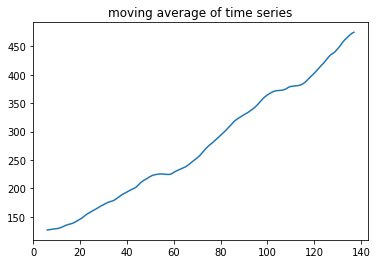

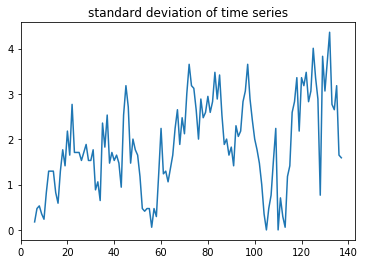

In [177]:
series1['MA2'].plot()
pyplot.title("moving average of time series")
pyplot.show()
series1['std2'].plot()
pyplot.title("standard deviation of time series")
pyplot.show()


     Month  Passengers  MA  std  MA2  std2
0  1949-01         112 NaN  NaN  NaN   NaN
1  1949-02         118 NaN  NaN  NaN   NaN
2  1949-03         132 NaN  NaN  NaN   NaN
3  1949-04         129 NaN  NaN  NaN   NaN
4  1949-05         121 NaN  NaN  NaN   NaN


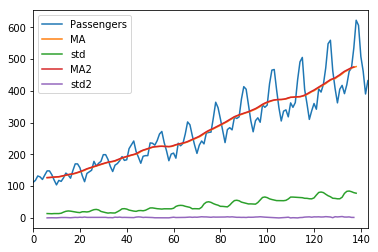

In [178]:

print(series1.head(5))
series1.plot()
pyplot.show()


 The obtained MA2 is the trend for our air passengers dataset.we have two types of decomposition a) Additive decompostion and b) Multiplicative decomposition to find the seasonality using this trend. I would remove the trend from the series using Additive decomposition approach as below:

In [179]:
#series1 = series1.fillna(0)
series1['detrend'] = series1['Passengers']-series1['MA2']
print(series1.head(5))

     Month  Passengers  MA  std  MA2  std2  detrend
0  1949-01         112 NaN  NaN  NaN   NaN      NaN
1  1949-02         118 NaN  NaN  NaN   NaN      NaN
2  1949-03         132 NaN  NaN  NaN   NaN      NaN
3  1949-04         129 NaN  NaN  NaN   NaN      NaN
4  1949-05         121 NaN  NaN  NaN   NaN      NaN


Note:If you choose multiplicative decomposition then you have to divide Passengers values by MA2 values to get the detrend data. Now using the detrended series we can take the weighted average to find the seasonality from it by replacing all NAN with zeros.

In [180]:
series1.describe()

,Passengers,MA,std,MA2,std2,detrend
count,144.000000,133.000000,133.000000,132.000000,132.000000,132.000000
mean,280.298611,278.177318,41.131143,278.001263,1.887404,-0.751263
std,119.966317,103.358404,20.049832,102.591115,1.012301,41.114906
min,104.000000,126.666667,13.166475,126.791667,0.000000,-84.708333
25%,180.000000,190.083333,23.282195,190.729167,1.237437,-25.552083
50%,265.500000,259.250000,36.433834,259.479167,1.767767,-7.708333
75%,360.500000,372.416667,59.590013,372.229167,2.666382,19.197917
max,622.000000,476.166667,84.617276,475.041667,4.360492,123.875000


In [181]:

series1 = series1.fillna(series1.mean())
seasonality_list =[]
#converting the detrend column to list
my_list = series1["detrend"].tolist()
sub_list = [my_list[x:x+12] for x in range(0,len(my_list),12)]
single_list = np.mean(sub_list,0)
for i in range(len(sub_list)):
    seasonality_list.extend(single_list)
#converting this seasonality list as a series1 dataframe column
series1["seasonality"] = seasonality_list
print(series1.head(5))


     Month  Passengers          MA        std         MA2      std2   detrend  \
0  1949-01         112  278.177318  41.131143  278.001263  1.887404 -0.751263   
1  1949-02         118  278.177318  41.131143  278.001263  1.887404 -0.751263   
2  1949-03         132  278.177318  41.131143  278.001263  1.887404 -0.751263   
3  1949-04         129  278.177318  41.131143  278.001263  1.887404 -0.751263   
4  1949-05         121  278.177318  41.131143  278.001263  1.887404 -0.751263   

   seasonality  
0   -23.437605  
1   -33.923716  
2    -2.805661  
3    -8.118161  
4    -4.882050  


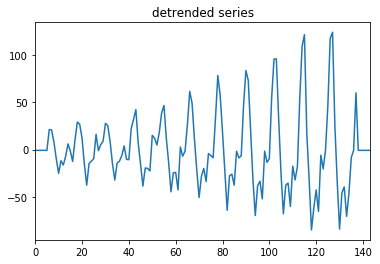

In [182]:
series1['detrend'].plot()
pyplot.title("detrended series")
pyplot.show()

Now, It seems like we have calculated the seasonality for the given air passengers dataset.The plot of the seasonality looks like below

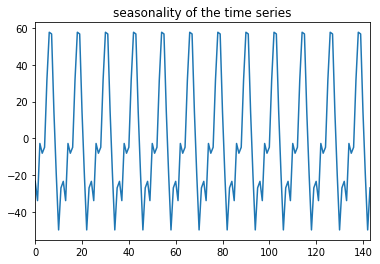

In [183]:
series1['seasonality'].plot()
pyplot.title("seasonality of the time series")
pyplot.show()

Lets remove trend and seasonality from the time series to get remainder as follows:

     Month  Passengers          MA        std         MA2      std2   detrend  \
0  1949-01         112  278.177318  41.131143  278.001263  1.887404 -0.751263   
1  1949-02         118  278.177318  41.131143  278.001263  1.887404 -0.751263   
2  1949-03         132  278.177318  41.131143  278.001263  1.887404 -0.751263   
3  1949-04         129  278.177318  41.131143  278.001263  1.887404 -0.751263   
4  1949-05         121  278.177318  41.131143  278.001263  1.887404 -0.751263   

   seasonality  remainder  
0   -23.437605  22.686343  
1   -33.923716  33.172454  
2    -2.805661   2.054398  
3    -8.118161   7.366898  
4    -4.882050   4.130787  


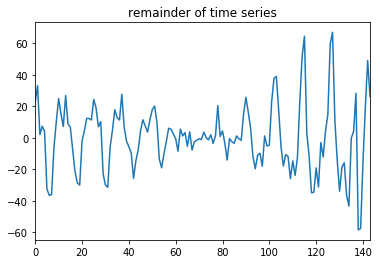

In [184]:
series1['remainder'] = series1['detrend']-series1['seasonality']
#Now removing the trend and remainder from the time series data we will be left with seasonality.
#series1['Passengers'] = series1['remainder']
print(series1.head(5))
series1['remainder'].plot()
pyplot.title("remainder of time series")
pyplot.show()

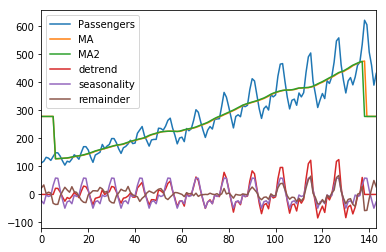

In [185]:
series1 = series1.drop(['std','std2'],axis=1)
series1.to_csv('C:\\Users\\saikiran\\Downloads\\stationary_dataset.csv', index = False)
series1.plot()
pyplot.show()

To confirm for the seasonality lets pass this time series to my stationary_check function implemented earlier

In [186]:
m1,m2,v1,v2 = stationary_check(series1['remainder'])
print("mean1 is :",m1)
print("mean2 is:",m2)
print("variance1 is:",v1)
print("variance2 is:",v2)

mean1 is : 0.492476851852
mean2 is: -0.492476851852
variance1 is: 251.964864361
variance2 is: 627.714605211


From the above result we can say that the Air passenger dataset is converted to stationary successfully but to confirm thislets perform Augmented Dickey-Fuller test for this dataframe column as below

In [187]:
X = series1['remainder'].values
result = adfuller(X)
print('test Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

test Statistic: -8.260382
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


### Thus, from the results obtained above we can say that since our test statistic values are less than the critical values, and p < 0.05we can reject null hypothesis and can confirm that this time series data has a seasonality.